In [1]:
from HeaderP import *
import Astraea

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [2]:
apoge=pd.read_pickle('../Data/Apogee_kepler_cm.pkl')
df=pd.read_pickle('../Data/APOGEE_Prot.pkl')
ages=readfits('../../SecondYear/apogee_astroNN-DR16-v1.fits')
ages

,APOGEE_ID,LOCATION_ID,TELESCOPE,RA_APOGEE,DEC_APOGEE,TEFF,TEFF_ERR,LOGG,LOGG_ERR,C_H,...,theta_phi,theta_phi_err,theta_z,theta_z_err,rl,rl_err,Energy,Energy_err,EminusEc,EminusEc_err
0,VESTA,1.0,apo1m,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2M00000002+7417074,5046.0,apo25m,0.000103,74.285408,3855.157227,49.542202,0.817739,0.188952,-0.065494,...,0.156882,0.004799,1.183869,0.053029,9.179817,0.149323,-36125.514493,786.841120,-53290.855192,349.118918
2,2M00000019-1924498,5071.0,apo25m,0.000832,-19.413851,5301.893066,87.216347,3.676076,0.287316,-0.231211,...,6.190612,0.020696,3.685223,0.032491,7.813145,0.170422,-43189.669301,801.581542,-55838.684879,192.400322
3,2M00000032+5737103,4424.0,apo25m,0.001335,57.619530,5731.417480,165.994400,2.851072,0.182911,-0.390399,...,0.106585,0.000682,4.110654,0.059737,8.953243,0.014118,-37972.494019,67.847124,-54460.159874,24.653441
4,2M00000032+5737103,4264.0,apo25m,0.001335,57.619530,5725.205566,159.599442,2.815395,0.218909,-0.476196,...,0.107246,0.000682,4.114248,0.060055,8.944326,0.014136,-38018.792895,67.938074,-54479.115463,24.631619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473302,2M23595756+8535275,5067.0,apo25m,359.989841,85.590996,5058.915039,74.910744,3.811991,0.332647,0.329254,...,0.074330,0.000192,2.201710,0.003951,9.067347,0.001673,-37046.466524,9.365413,-53880.826626,4.355623
473303,2M23595837+5700444,4264.0,apo25m,359.993224,57.012356,4892.823730,32.387299,2.413542,0.033932,-0.397376,...,0.483988,0.005541,5.501196,0.045717,12.510647,0.225068,-23508.481557,797.829500,-48605.532648,365.969703
473304,2M23595886-2009435,5071.0,apo25m,359.995258,-20.162107,5457.661133,115.059898,4.028604,0.508939,0.239907,...,6.182002,0.004209,4.910762,0.014647,8.225137,0.023995,-40535.943450,81.407036,-54660.428261,14.298320
473305,2M23595886+5726058,4424.0,apo25m,359.995265,57.434956,4852.323730,23.762592,2.430786,0.027727,-0.255256,...,0.246891,0.001724,3.616162,0.019596,8.667439,0.042496,-38955.897258,209.752796,-54547.797585,74.409333


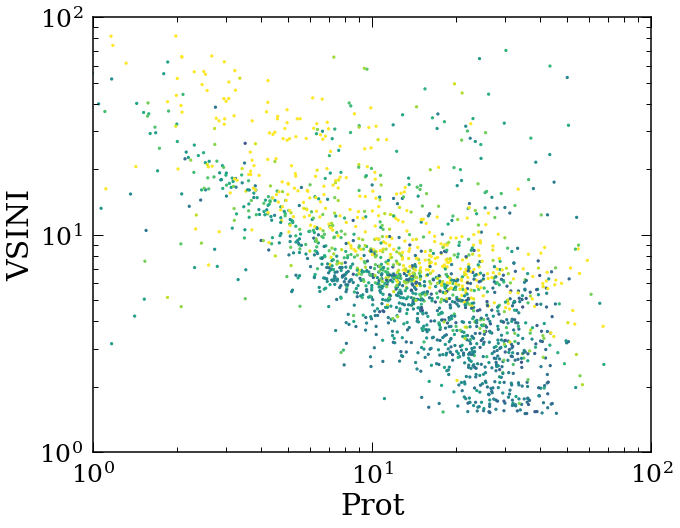

In [8]:
apoge=apoge.loc[apoge['Prot']>0].reset_index()
apoge=apoge.loc[apoge['VSINI']>0].reset_index()
plt.figure(figsize=(10,8))
plt.scatter(apoge['Prot'],apoge['VSINI'],c=apoge['radius_val'],s=5,vmin=0,vmax=2)
plt.xlabel('Prot')
plt.ylabel('VSINI')
plt.ylim([1,100])
plt.xlim([1,100])
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'VSINI')

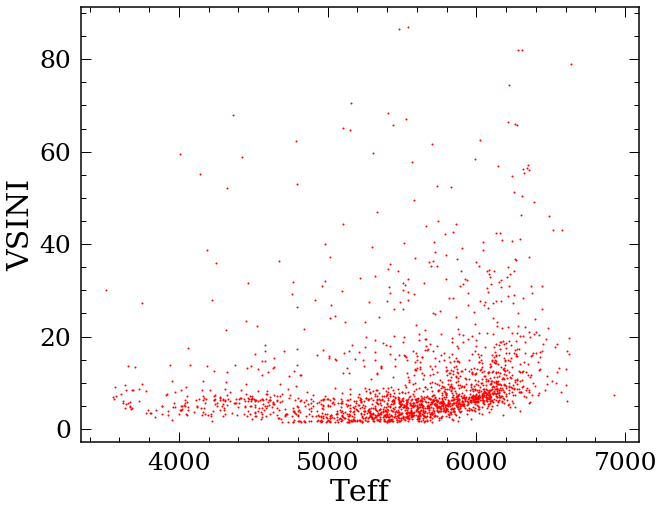

In [9]:
apoge=apoge.loc[apoge['TEFF']>0]
plt.figure(figsize=(10,8))
plt.scatter(apoge['TEFF'],apoge['VSINI'],c='r',s=1)
plt.xlabel('Teff')
plt.ylabel('VSINI')


In [10]:
df=df[[i for i in df.columns if 'age' not in i]]
df['Prot']=df['Prot_cannon']

In [11]:
df['APOGEE_ID']=df['ID']
df=pd.concat([df,apoge]).reset_index(drop=True)
df=df.drop_duplicates(subset='APOGEE_ID')


In [12]:
df=pd.merge(df,ages[['APOGEE_ID','age','age_total_error']],left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')
df

,APOGEE_ID_x,ID,M_H_cannon,TEFF_cannon,LOGG_cannon,Prot_cannon,radius_cannon,VSINI_cannon,M_H_err_cannon,TEFF_err_cannon,...,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist,age,age_total_error
0,2M00005343+0040594,2M00005343+0040594,-0.156467,5984.894487,4.306812,3.858361,0.895407,26.528016,0.070620,0.030784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.218682,2.065147
1,2M00021917+0142107,2M00021917+0142107,-0.034016,5079.506140,4.477082,7.630808,1.119993,11.294856,0.035705,0.015499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.675029,1.861890
2,2M00024876-0018006,2M00024876-0018006,-0.100265,4924.077521,4.688635,24.855807,0.609487,15.381693,0.030984,0.013736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.829245,2.102043
3,2M00033917+0204106,2M00033917+0204106,-0.181113,5892.900001,4.180698,8.887853,1.690836,54.922214,0.043290,0.021102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.816360,2.213106
4,2M00062867+6955129,2M00062867+6955129,-0.041287,5206.796780,4.445923,55.149756,1.595549,64.574831,0.057861,0.034954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.590408,4.593586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,10.784,10.536,10.457,none,0.048037,3.688004,2.098387
4337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,11.283,10.659,10.581,none,0.092620,11.121162,2.950535
4338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,11.041,10.857,10.797,none,0.073056,2.828768,1.519001
4339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,10.392,10.036,9.980,none,0.121739,5.856393,1.590663


In [230]:
protreal=apoge.loc[abs(apoge['M_H'])<0.05]
protreal=pd.merge(protreal,ages[['APOGEE_ID','age','age_total_error']],left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')
protreal

,level_0,index,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,...,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_ang_dist,age,age_total_error
0,8,384957,apogee.apo25m.s.stars.K03_077+20.2M18422693+47...,apo25m.5003.K03_077+20.2M18422693+4722242,apogee.apo25m.s.r12-l33.K03_077+20.2M18422693+...,apStar-r12-2M18422693+4722242.fits,2M18422693+4722242,apo25m,5003,K03_077+20,...,0.0,0.0,4.0,10.175,9.975,9.897,none,0.225158,4.715823,2.032450
1,10,384978,apogee.apo25m.s.stars.K08_073+19.2M18423164+43...,apo25m.5008.K08_073+19.2M18423164+4316380,apogee.apo25m.s.r12-l33.K08_073+19.2M18423164+...,apStar-r12-2M18423164+4316380.fits,2M18423164+4316380,apo25m,5008,K08_073+19,...,0.0,0.0,0.0,9.952,9.708,9.672,none,0.059255,3.555048,1.666997
2,15,385309,apogee.apo25m.s.stars.K08_073+19.2M18433657+42...,apo25m.5008.K08_073+19.2M18433657+4236306,apogee.apo25m.s.r12-l33.K08_073+19.2M18433657+...,apStar-r12-2M18433657+4236306.fits,2M18433657+4236306,apo25m,5008,K08_073+19,...,0.0,0.0,0.0,10.127,9.779,9.700,none,0.083882,6.349337,1.605462
3,16,385311,apogee.apo25m.s.stars.K08_073+19.2M18433663+42...,apo25m.5008.K08_073+19.2M18433663+4236399,apogee.apo25m.s.r12-l33.K08_073+19.2M18433663+...,apStar-r12-2M18433663+4236399.fits,2M18433663+4236399,apo25m,5008,K08_073+19,...,0.0,0.0,0.0,8.970,8.768,8.722,none,0.090437,4.224582,1.885438
4,18,385377,apogee.apo25m.s.stars.K03_077+20.2M18434759+47...,apo25m.4408.K03_077+20.2M18434759+4709580,apogee.apo25m.s.r12-l33.K03_077+20.2M18434759+...,apStar-r12-2M18434759+4709580.fits,2M18434759+4709580,apo25m,4408,K03_077+20,...,0.0,0.0,0.0,11.479,10.836,10.703,none,0.068270,9.117860,2.210134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2027,436841,apogee.apo25m.s.stars.K14_080+08.2M20000459+43...,apo25m.5014.K14_080+08.2M20000459+4354503,apogee.apo25m.s.r12-l33.K14_080+08.2M20000459+...,apStar-r12-2M20000459+4354503.fits,2M20000459+4354503,apo25m,5014,K14_080+08,...,0.0,0.0,0.0,10.402,10.098,10.041,none,0.095314,4.690827,1.712391
520,2035,437277,apogee.apo25m.s.stars.K14_080+08.2M20012993+46...,apo25m.5014.K14_080+08.2M20012993+4604035,apogee.apo25m.s.r12-l33.K14_080+08.2M20012993+...,apStar-r12-2M20012993+4604035.fits,2M20012993+4604035,apo25m,5014,K14_080+08,...,0.0,0.0,0.0,11.446,11.152,11.112,none,0.092272,3.085504,1.651310
521,2038,437346,apogee.apo25m.s.stars.K14_080+08.2M20014237+45...,apo25m.5014.K14_080+08.2M20014237+4543291,apogee.apo25m.s.r12-l33.K14_080+08.2M20014237+...,apStar-r12-2M20014237+4543291.fits,2M20014237+4543291,apo25m,5014,K14_080+08,...,0.0,0.0,2.0,10.712,10.445,10.388,none,0.110884,3.843096,2.117279
522,2051,437771,apogee.apo25m.s.stars.K14_080+08.2M20031896+44...,apo25m.5014.K14_080+08.2M20031896+4410404,apogee.apo25m.s.r12-l33.K14_080+08.2M20031896+...,apStar-r12-2M20031896+4410404.fits,2M20031896+4410404,apo25m,5014,K14_080+08,...,0.0,0.0,3.0,11.049,10.696,10.612,none,0.122806,6.757500,1.735991


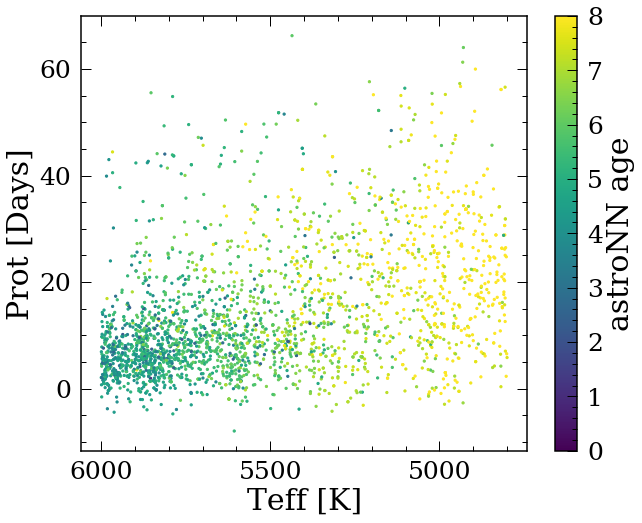

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(df['TEFF'],df['Prot_cannon'],s=5,c=df['age'],vmin=0,vmax=8)
plt.xlabel('Teff [K]')
plt.ylabel('Prot [Days]')
plt.gca().invert_xaxis()
#plt.xlim([3000,7000])
#plt.ylim([0,50])
cb=plt.colorbar()
cb.set_label('astroNN age')



In [16]:
solarstars=df.loc[abs(df['M_H']+0.05)<0.05]
solarstars=solarstars.reset_index(drop=True)
print(np.shape(solarstars))

(1110, 368)


In [270]:
def plotdiag(solarstars,element,protselect,window):
    plt.figure(figsize=(10,8))
    cm = plt.cm.get_cmap('viridis',10)

    plt.scatter(solarstars['age'],solarstars[element],s=5,c=solarstars['Prot'],
                cmap=cm,vmin=0,vmax=30)
    cb=plt.colorbar()
    cb.set_label('Predicted periods [days]')
    plt.xlabel('Age [Gyr]')
    plt.ylabel(element)
    plt.xlim([2,10])
    plt.ylim([-0.2,0.3])
    
    print(min(solarstars['Prot']),max((solarstars['Prot'])))
    
    cm = plt.cm.get_cmap('viridis',10)
    
    # all seperated by periods
    plt.figure(figsize=(10*(len(protselect)),10))
    for i in range(1,len(protselect)):
        plt.figure(figsize=(10,8))
        m1=(solarstars['Prot']>protselect[i]-window) & (solarstars['Prot']<protselect[i]+window)
        m2=(solarstars['age']<10)
        m=m1&m2

        plt.scatter(solarstars['age'][m],solarstars[element][m],
                s=10,c=solarstars['Prot'][m],cmap=cm,vmin=0,vmax=30)
        cb=plt.colorbar()
        cb.set_label('Predicted periods [days]')
        plt.xlabel('Age [Gyr]')
        plt.ylabel(element)
        plt.xlim([2,10])
        plt.ylim([-0.2,0.3])
        plt.title('%d < Prot < %d'%(protselect[i]-window,protselect[i]+window),fontsize=25)
    plt.tight_layout()
    return 1
        

In [271]:
def calc_disp(df,name):
    df_dropna=df.dropna(subset=['age',name,name+'_ERR'])
    
    #p=fitpoints(df_dropna['age'].values,df_dropna[name].values)
    z = np.polyfit(df_dropna['age'].values,df_dropna[name].values,2)
    p = np.poly1d(z)
    
    totdisp=np.mean((df_dropna[name]-p(df_dropna['age']))**2.)
    meadisp=calc_measure_disp(df,name,p)
    intdisp=np.sqrt(totdisp-meadisp)
    return np.sqrt(totdisp),intdisp


def calc_measure_disp(df,name,p):
    trytime=50
    agedisp=[]
    
    x,xerr=df['age'].values,df['age_total_error'].values
    y,yerr=df[name].values,df[name+'_ERR'].values
    
    for i in range(trytime):
        df['newage']=np.array([np.random.normal(x[k], xerr[k],1)[0] for k in range(len(x))])
        df['newabun']=np.array([np.random.normal(y[k], yerr[k],1)[0] for k in range(len(y))])
        df['newmed']=p(df['newage'])
            
        agedisp.append(np.mean((df['newabun']-df['newmed'])**2.))
            
            
    return np.std(np.array(agedisp))**2.



In [272]:
import random

def calcdisp_prot(solarstars,element,protselect,window,varib='Prot'):

    disps=np.zeros(len(protselect))
    totdisp=np.zeros(len(protselect))
    nostar=np.zeros(len(protselect))
    meanprot=np.zeros(len(protselect))


    for i in range(len(protselect)):
        m=(solarstars[varib]>protselect[i]-window) & (solarstars[varib]<protselect[i]+window)
        nostar[i]=(sum(m))
    
    starpick=min(nostar)
    #print(starpick)

    for i in range(len(protselect)):
        m=(solarstars[varib]>protselect[i]-window) & (solarstars[varib]<protselect[i]+window)
        df=solarstars[m].reset_index(drop=True)
    
        ind=range(len(df))
        picked=random.sample(ind, int(starpick))
        df=df.iloc[picked].reset_index(drop=True)
    
        totdisp[i],disps[i]=calc_disp(df,element)
        meanprot[i]=protselect[i]
    return meanprot,disps,nostar
    

## For Mg (real Prot + Cannon)

-3.1023980609774715 57.59484556295479


1

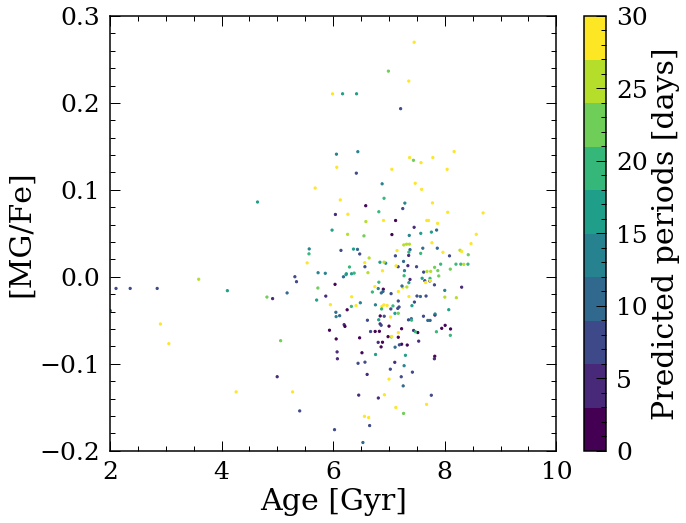

<Figure size 7200x720 with 0 Axes>

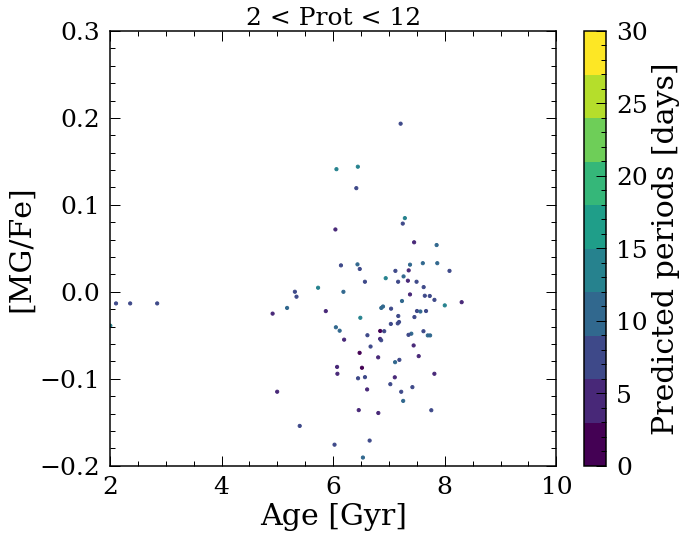

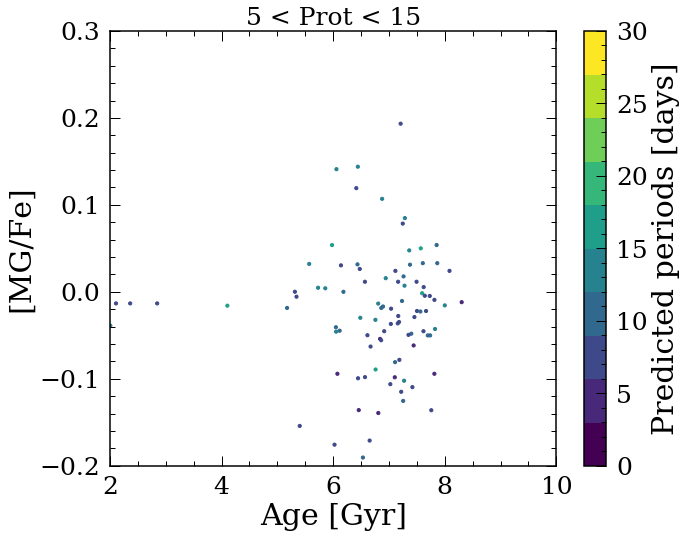

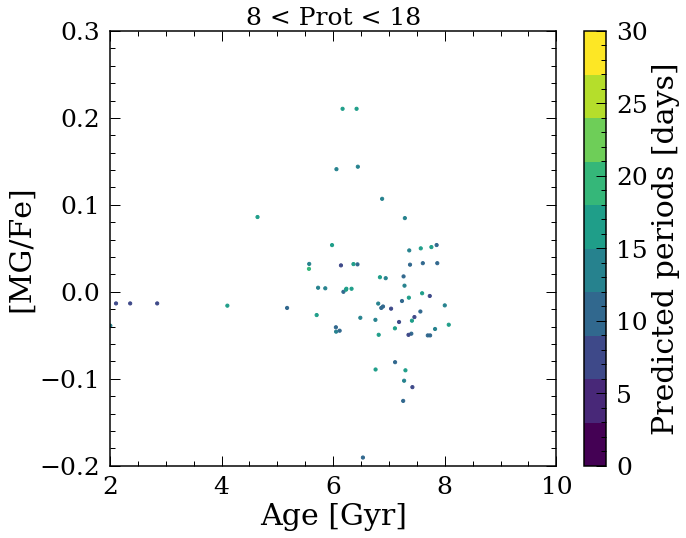

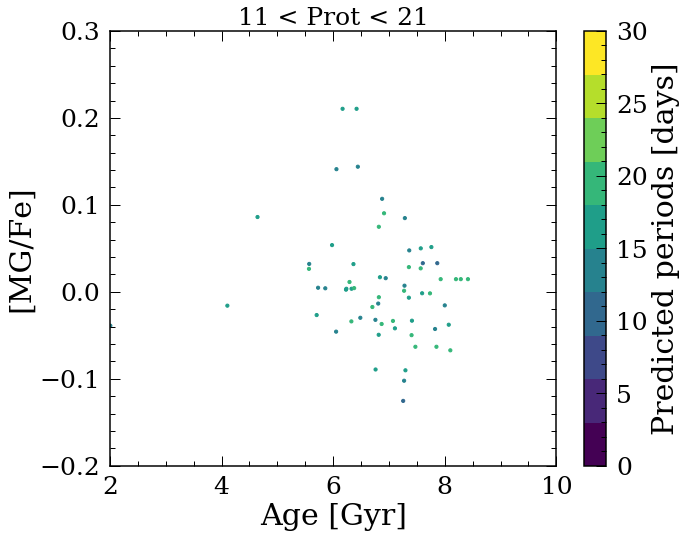

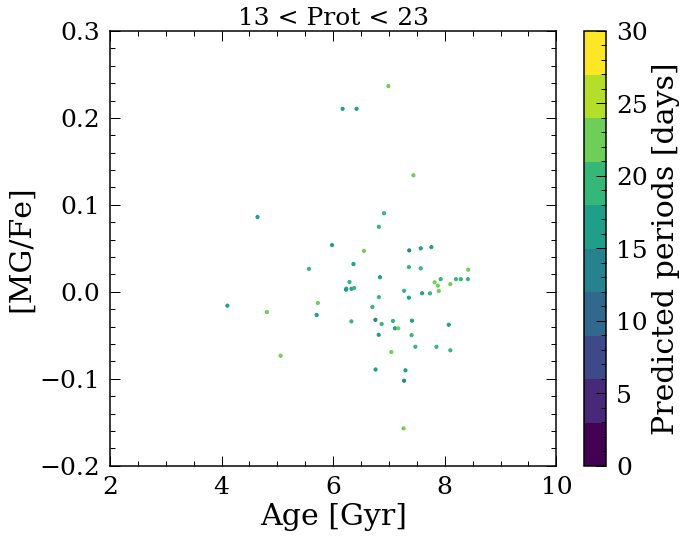

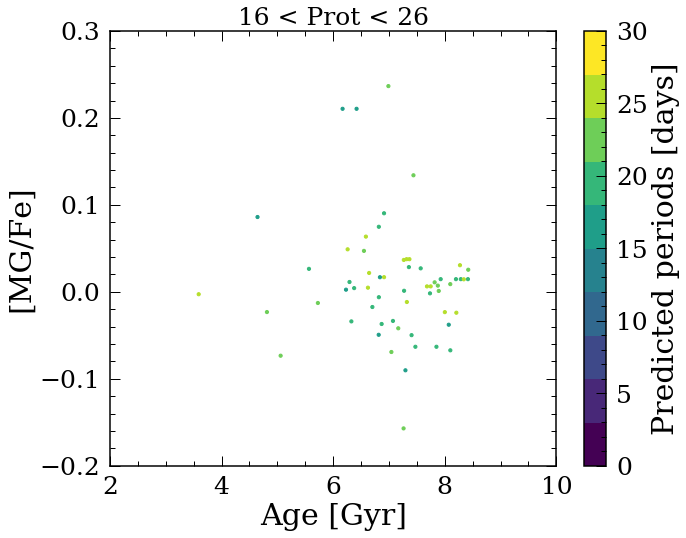

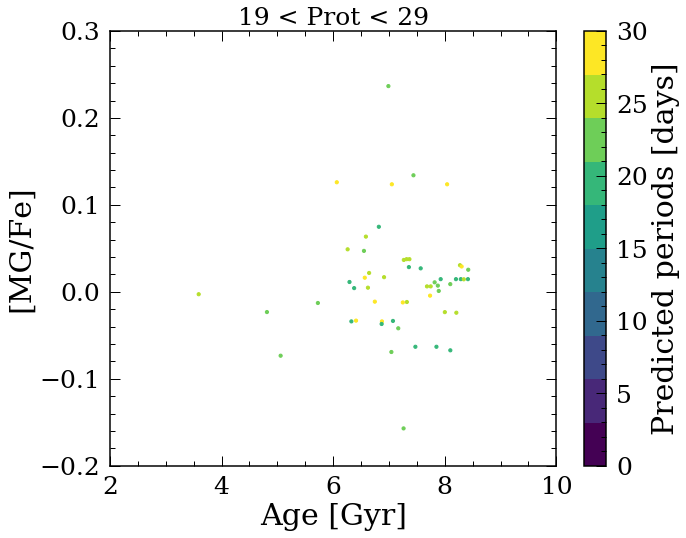

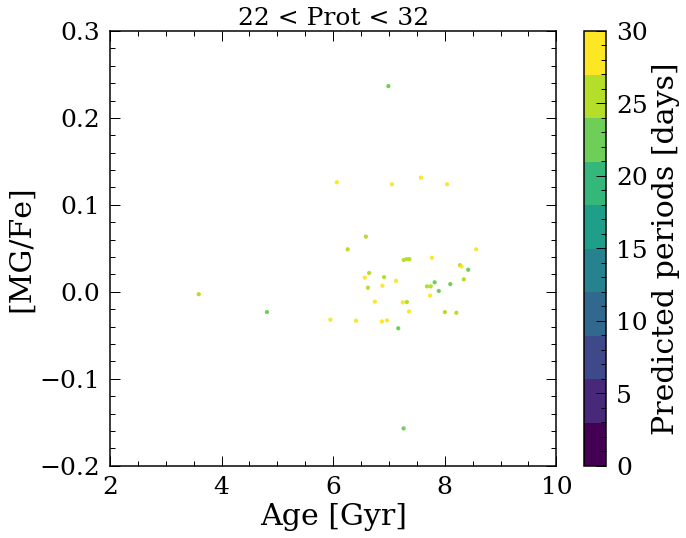

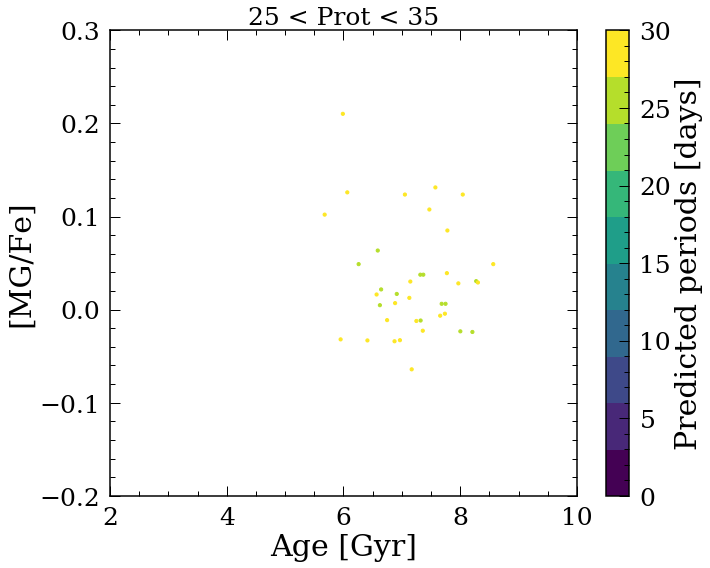

In [196]:
protselect=np.linspace(5,30,10)
solarstars=solarstars.loc[solarstars['MG_FE']>-1000]
plotdiag(solarstars,'MG',protselect,5)


In [217]:
Nopoints=10
trytime=50

#solarstars=solarstars.loc[abs(solarstars['TEFF']-5250)<250].reset_index(drop=True)
protselect=np.linspace(5,25,Nopoints)

disps=np.zeros((trytime,len(protselect)))

for i in trange(trytime):
    meanprot,disps[i,:],starpick=calcdisp_prot(solarstars,'MG',protselect,5)

sigma=[np.mean(disps[:,i]) for i in range(Nopoints)]
sigma_err=[np.std(disps[:,i]) for i in range(Nopoints)]








  0%|          | 0/50 [00:00<?, ?it/s]






  2%|▏         | 1/50 [00:01<00:53,  1.09s/it]






  4%|▍         | 2/50 [00:02<00:56,  1.17s/it]






  6%|▌         | 3/50 [00:04<01:04,  1.37s/it]






  8%|▊         | 4/50 [00:05<01:04,  1.40s/it]






 10%|█         | 5/50 [00:06<00:58,  1.30s/it]






 12%|█▏        | 6/50 [00:07<00:54,  1.24s/it]






 14%|█▍        | 7/50 [00:09<00:51,  1.19s/it]






 16%|█▌        | 8/50 [00:10<00:49,  1.17s/it]






 18%|█▊        | 9/50 [00:11<00:46,  1.14s/it]






 20%|██        | 10/50 [00:12<00:45,  1.13s/it]






 22%|██▏       | 11/50 [00:13<00:43,  1.12s/it]






 24%|██▍       | 12/50 [00:14<00:42,  1.11s/it]






 26%|██▌       | 13/50 [00:15<00:41,  1.12s/it]






 28%|██▊       | 14/50 [00:16<00:40,  1.12s/it]






 30%|███       | 15/50 [00:17<00:39,  1.13s/it]






 32%|███▏      | 16/50 [00:18<00:37,  1.11s/it]






 34%|███▍      | 17/50 [00:20<00:36,  1.10s/it]






 36%|███▌      | 18/50 [00:21<00:36,  1

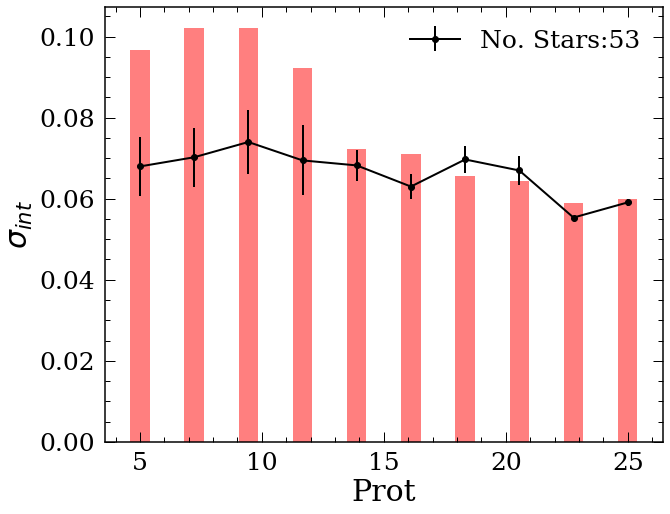

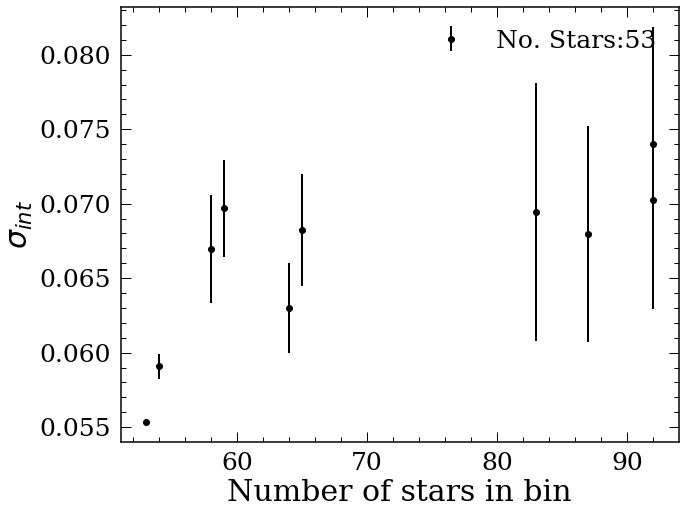

In [226]:
plt.figure(figsize=(10,8))
plt.errorbar(meanprot,sigma,yerr=sigma_err,fmt='k-o',label='No. Stars:'+str(int(min(starpick))))
plt.bar(meanprot,starpick/9e2,color='r',alpha=0.5)
plt.xlabel('Prot')
plt.ylabel('$σ_{int}$')
plt.legend()

plt.figure(figsize=(10,8))
plt.errorbar(starpick,sigma,yerr=sigma_err,fmt='ko',label='No. Stars:'+str(int(min(starpick))))
plt.xlabel('Number of stars in bin')
plt.ylabel('$σ_{int}$')
plt.legend()

### check TEFF dependence

In [227]:
# change with teff
Nopoints=10
trytime=50
window=125

protselect=np.linspace(5000,5500,Nopoints)

disps=np.zeros((trytime,len(protselect)))

for i in trange(trytime):
    meanprot,disps[i,:],starpick=calcdisp_prot(solarstars,'MG',protselect,window,varib='TEFF')

sigma=[np.mean(disps[:,i]) for i in range(Nopoints)]
sigma_err=[np.std(disps[:,i]) for i in range(Nopoints)]








  0%|          | 0/50 [00:00<?, ?it/s]






  2%|▏         | 1/50 [00:01<00:53,  1.10s/it]






  4%|▍         | 2/50 [00:02<00:57,  1.20s/it]






  6%|▌         | 3/50 [00:03<00:56,  1.20s/it]






  8%|▊         | 4/50 [00:05<00:58,  1.27s/it]






 10%|█         | 5/50 [00:06<01:01,  1.38s/it]






 12%|█▏        | 6/50 [00:08<01:02,  1.42s/it]






 14%|█▍        | 7/50 [00:09<01:01,  1.44s/it]






 16%|█▌        | 8/50 [00:11<01:03,  1.51s/it]






 18%|█▊        | 9/50 [00:13<01:03,  1.54s/it]






 20%|██        | 10/50 [00:14<00:58,  1.47s/it]






 22%|██▏       | 11/50 [00:15<00:52,  1.35s/it]






 24%|██▍       | 12/50 [00:17<00:54,  1.43s/it]






 26%|██▌       | 13/50 [00:19<01:02,  1.68s/it]






 28%|██▊       | 14/50 [00:20<00:56,  1.57s/it]






 30%|███       | 15/50 [00:21<00:49,  1.41s/it]






 32%|███▏      | 16/50 [00:22<00:44,  1.32s/it]






 34%|███▍      | 17/50 [00:23<00:40,  1.24s/it]






 36%|███▌      | 18/50 [00:24<00:38,  1

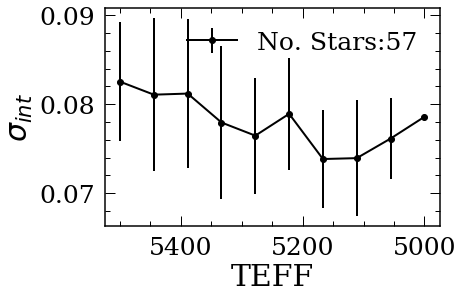

In [186]:
plt.figure()
plt.errorbar(meanprot,sigma,yerr=sigma_err,fmt='k-o',label='No. Stars:'+str(int(starpick)))
plt.xlabel('TEFF')
plt.ylabel('$σ_{int}$')
plt.gca().invert_xaxis()
plt.legend()

## For Mg (real Prot)

0.223 59.023


1

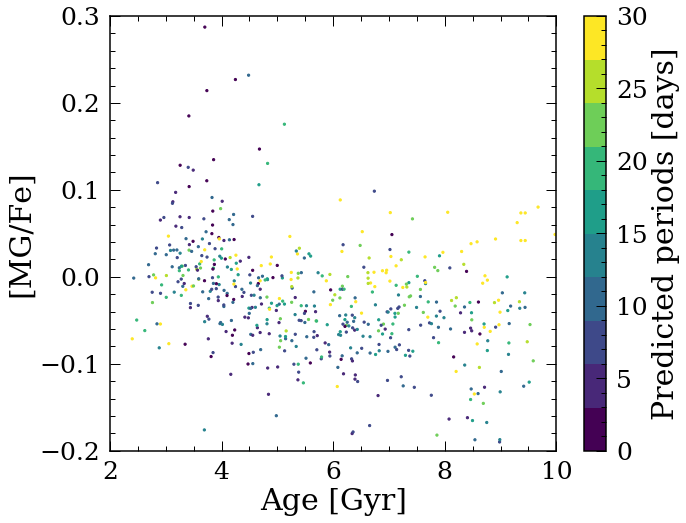

<Figure size 7200x720 with 0 Axes>

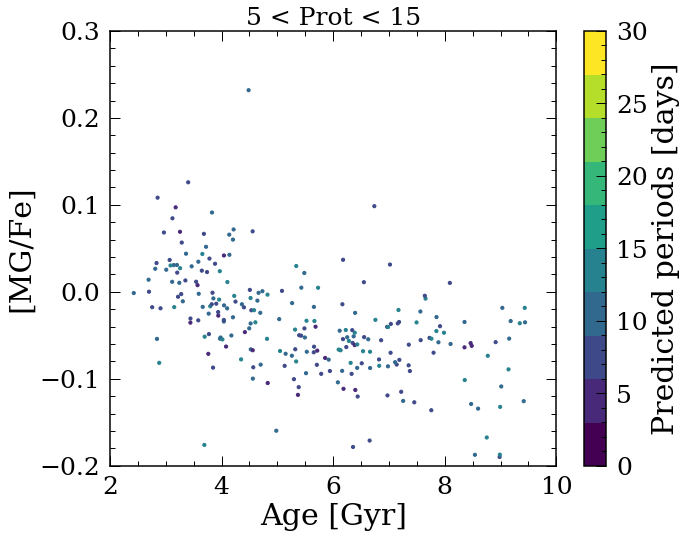

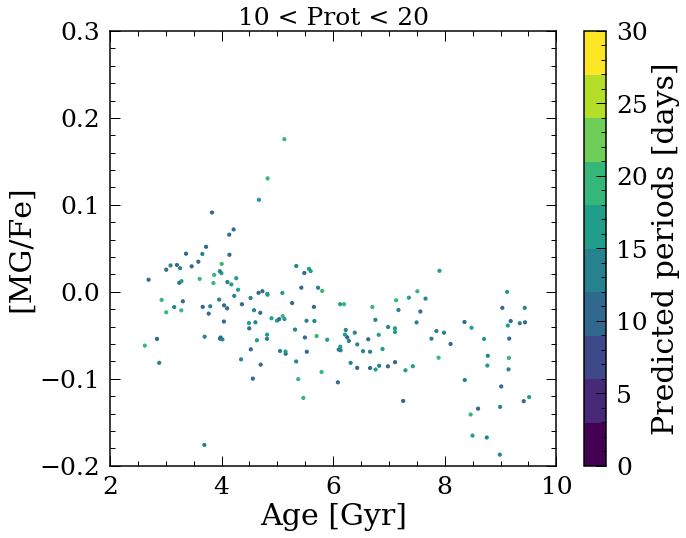

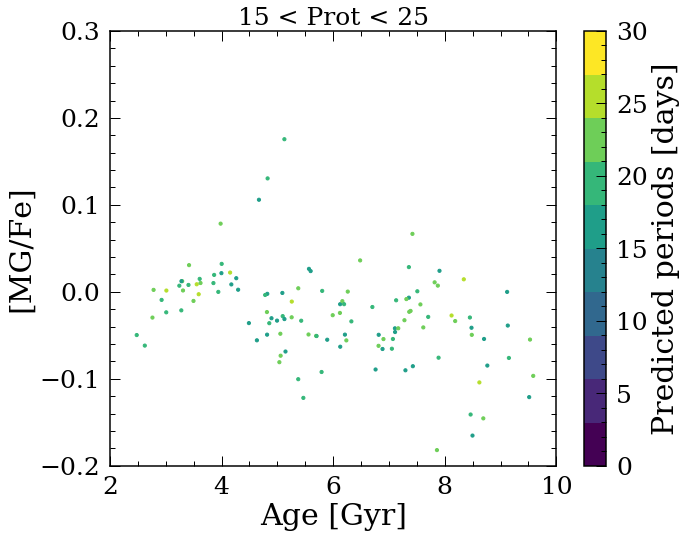

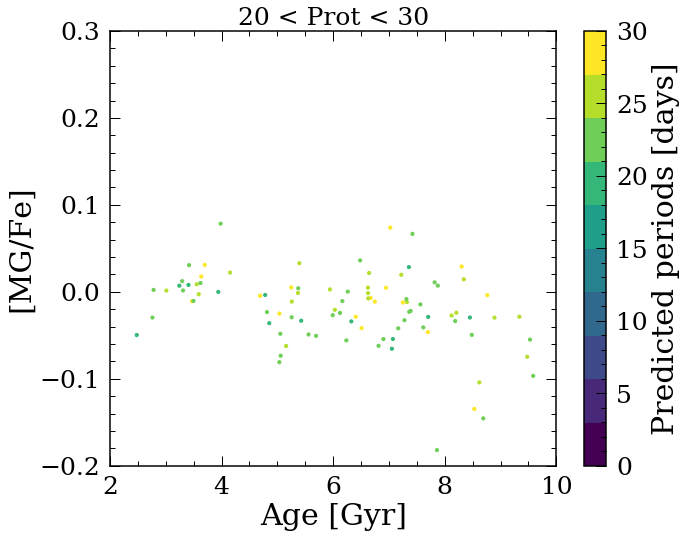

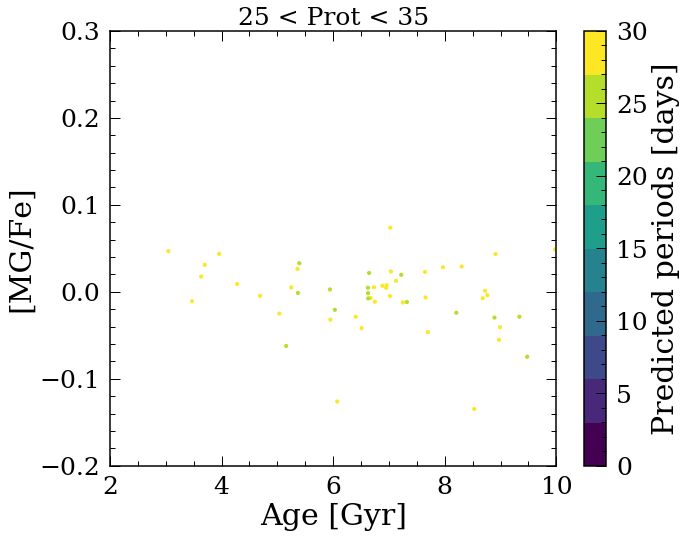

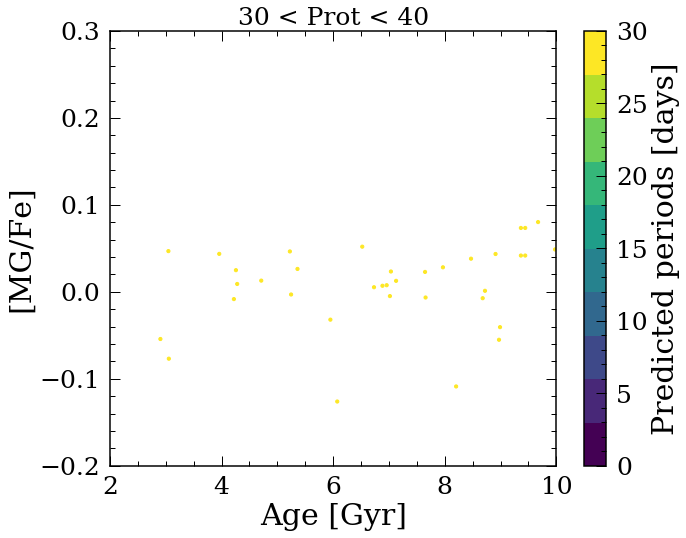

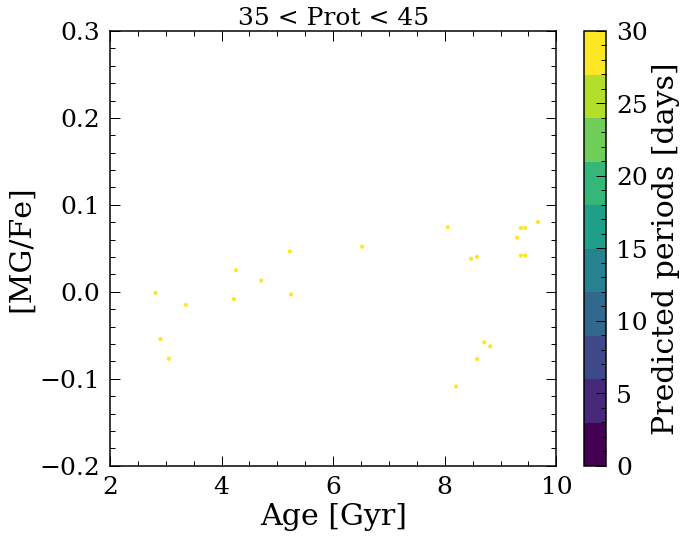

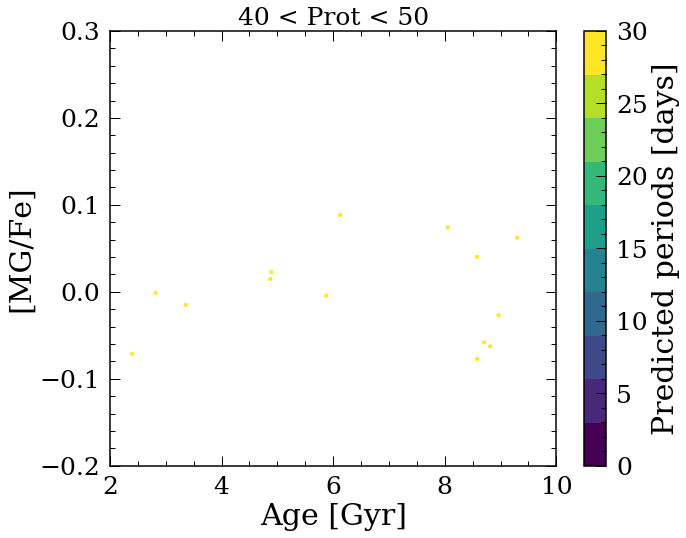

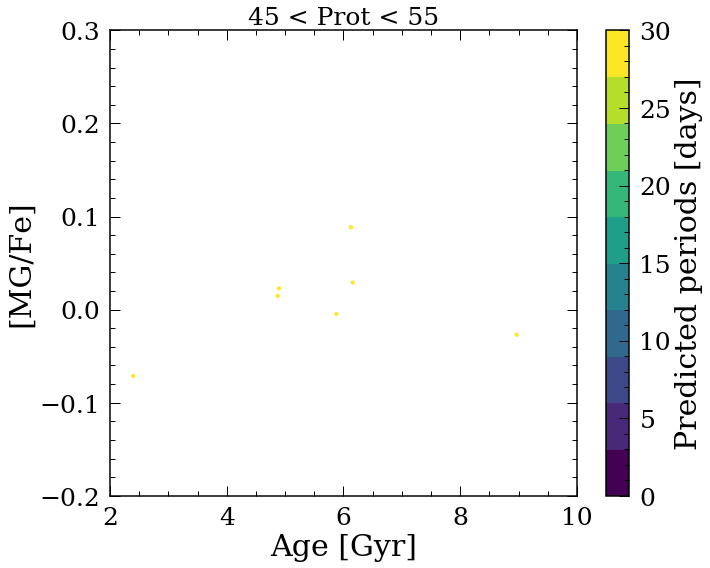

In [197]:
protselect=np.linspace(5,50,10)
protreal=protreal.loc[protreal['MG_FE']>-1000]
plotdiag(protreal,'MG',protselect,5)


In [257]:
Nopoints=10
trytime=50

#protreal=protreal.loc[abs(protreal['TEFF']-5250)<250].reset_index(drop=True)
protselect=np.linspace(5,25,Nopoints)

disps=np.zeros((trytime,len(protselect)))

for i in trange(trytime):
    meanprot,disps[i,:],starpick=calcdisp_prot(protreal,'MG',protselect,5)

sigma=[np.mean(pd.Series(disps[:,i]).dropna()) for i in range(Nopoints)]
sigma_err=[np.std(pd.Series(disps[:,i]).dropna()) for i in range(Nopoints)]









  0%|          | 0/50 [00:00<?, ?it/s]







  2%|▏         | 1/50 [00:00<00:34,  1.43it/s]







  4%|▍         | 2/50 [00:01<00:32,  1.46it/s]







  6%|▌         | 3/50 [00:02<00:32,  1.45it/s]







  8%|▊         | 4/50 [00:02<00:33,  1.35it/s]







 10%|█         | 5/50 [00:03<00:33,  1.36it/s]







 12%|█▏        | 6/50 [00:04<00:31,  1.39it/s]







 14%|█▍        | 7/50 [00:05<00:30,  1.39it/s]







 16%|█▌        | 8/50 [00:05<00:29,  1.44it/s]







 18%|█▊        | 9/50 [00:06<00:27,  1.48it/s]







 20%|██        | 10/50 [00:06<00:26,  1.51it/s]







 22%|██▏       | 11/50 [00:07<00:25,  1.54it/s]







 24%|██▍       | 12/50 [00:08<00:24,  1.56it/s]







 26%|██▌       | 13/50 [00:08<00:24,  1.50it/s]







 28%|██▊       | 14/50 [00:09<00:24,  1.47it/s]







 30%|███       | 15/50 [00:10<00:24,  1.43it/s]







 32%|███▏      | 16/50 [00:11<00:23,  1.45it/s]







 34%|███▍      | 17/50 [00:11<00:22,  1.46it/s]







 36%|███▌      | 18/

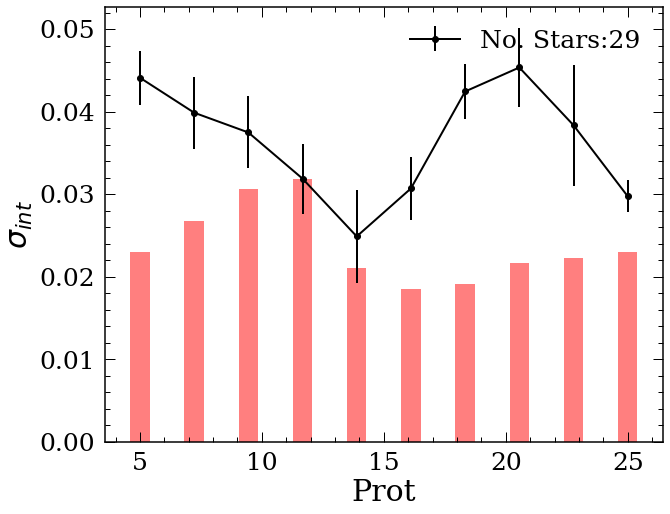

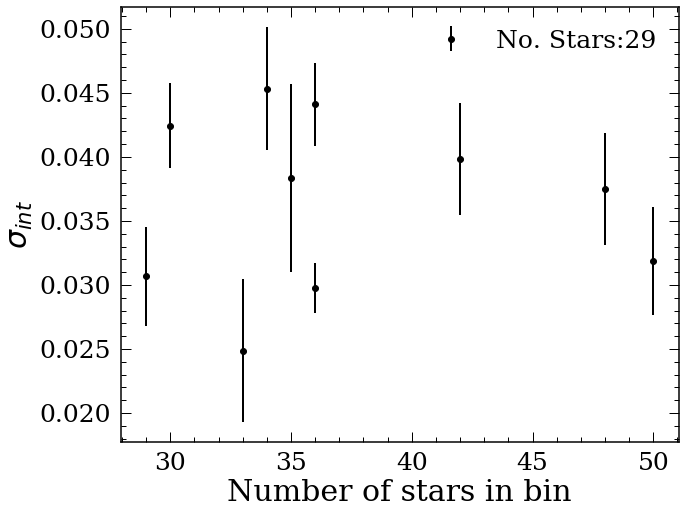

In [258]:
plt.figure(figsize=(10,8))
plt.errorbar(meanprot,sigma,yerr=sigma_err,fmt='k-o',label='No. Stars:'+str(int(min(starpick))))
normf=max(starpick/sigma)
plt.bar(meanprot,starpick/normf,color='r',alpha=0.5)
plt.xlabel('Prot')
plt.ylabel('$σ_{int}$')
plt.legend()

plt.figure(figsize=(10,8))
plt.errorbar(starpick,sigma,yerr=sigma_err,fmt='ko',label='No. Stars:'+str(int(min(starpick))))
plt.xlabel('Number of stars in bin')
plt.ylabel('$σ_{int}$')
plt.legend()

### check TEFF dependence

In [255]:
# change with teff
Nopoints=10
trytime=50
window=125

protselect=np.linspace(5000,5500,Nopoints)

disps=np.zeros((trytime,len(protselect)))

for i in trange(trytime):
    meanprot,disps[i,:],starpick=calcdisp_prot(protreal,'MG',protselect,window,varib='TEFF')

sigma=[np.mean(pd.Series(disps[:,i]).dropna()) for i in range(Nopoints)]
sigma_err=[np.std(pd.Series(disps[:,i]).dropna()) for i in range(Nopoints)]









  0%|          | 0/50 [00:00<?, ?it/s]







  2%|▏         | 1/50 [00:00<00:40,  1.21it/s]







  4%|▍         | 2/50 [00:02<00:45,  1.05it/s]







  6%|▌         | 3/50 [00:02<00:43,  1.09it/s]







  8%|▊         | 4/50 [00:03<00:44,  1.03it/s]







 10%|█         | 5/50 [00:04<00:44,  1.02it/s]







 12%|█▏        | 6/50 [00:06<00:45,  1.03s/it]







 14%|█▍        | 7/50 [00:07<00:42,  1.02it/s]







 16%|█▌        | 8/50 [00:07<00:39,  1.08it/s]







 18%|█▊        | 9/50 [00:08<00:38,  1.05it/s]







 20%|██        | 10/50 [00:09<00:37,  1.08it/s]







 22%|██▏       | 11/50 [00:10<00:34,  1.13it/s]







 24%|██▍       | 12/50 [00:11<00:33,  1.15it/s]







 26%|██▌       | 13/50 [00:12<00:34,  1.07it/s]







 28%|██▊       | 14/50 [00:13<00:37,  1.04s/it]







 30%|███       | 15/50 [00:15<00:39,  1.14s/it]







 32%|███▏      | 16/50 [00:16<00:41,  1.22s/it]







 34%|███▍      | 17/50 [00:17<00:40,  1.22s/it]







 36%|███▌      | 18/

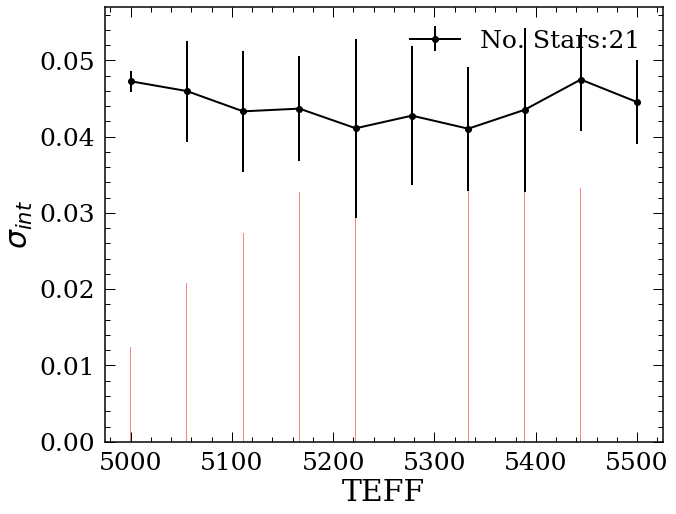

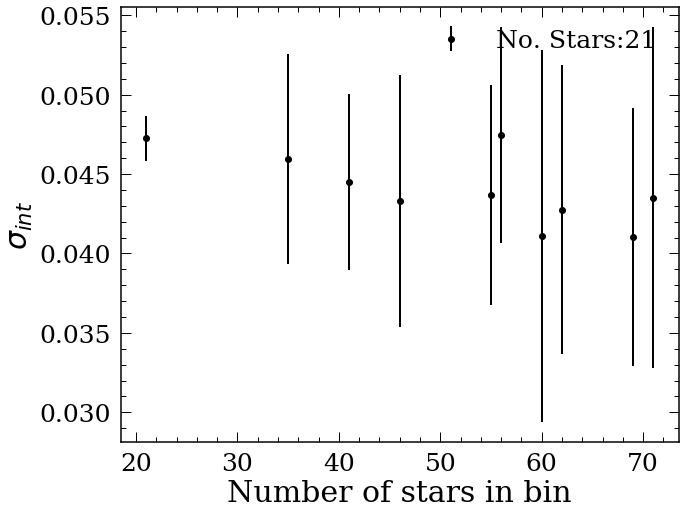

In [256]:
plt.figure(figsize=(10,8))
plt.errorbar(meanprot,sigma,yerr=sigma_err,fmt='k-o',label='No. Stars:'+str(int(min(starpick))))
normf=max(starpick/sigma)
plt.bar(meanprot,starpick/normf,color='r',alpha=0.5)
plt.xlabel('TEFF')
plt.ylabel('$σ_{int}$')
plt.legend()

plt.figure(figsize=(10,8))
plt.errorbar(starpick,sigma,yerr=sigma_err,fmt='ko',label='No. Stars:'+str(int(min(starpick))))
plt.xlabel('Number of stars in bin')
plt.ylabel('$σ_{int}$')
plt.legend()

## For C (real Prot)

In [259]:
Nopoints=10
trytime=50

#protreal=protreal.loc[abs(protreal['TEFF']-5250)<250].reset_index(drop=True)
protselect=np.linspace(5,25,Nopoints)

disps=np.zeros((trytime,len(protselect)))

for i in trange(trytime):
    meanprot,disps[i,:],starpick=calcdisp_prot(protreal,'C',protselect,5)

sigma=[np.mean(pd.Series(disps[:,i]).dropna()) for i in range(Nopoints)]
sigma_err=[np.std(pd.Series(disps[:,i]).dropna()) for i in range(Nopoints)]









  0%|          | 0/50 [00:00<?, ?it/s]







  2%|▏         | 1/50 [00:00<00:34,  1.44it/s]







  4%|▍         | 2/50 [00:01<00:33,  1.43it/s]







  6%|▌         | 3/50 [00:02<00:34,  1.37it/s]







  8%|▊         | 4/50 [00:03<00:34,  1.33it/s]







 10%|█         | 5/50 [00:03<00:33,  1.35it/s]







 12%|█▏        | 6/50 [00:04<00:33,  1.31it/s]







 14%|█▍        | 7/50 [00:05<00:31,  1.35it/s]







 16%|█▌        | 8/50 [00:05<00:30,  1.36it/s]







 18%|█▊        | 9/50 [00:06<00:30,  1.34it/s]







 20%|██        | 10/50 [00:07<00:29,  1.36it/s]







 22%|██▏       | 11/50 [00:08<00:27,  1.41it/s]







 24%|██▍       | 12/50 [00:08<00:26,  1.43it/s]







 26%|██▌       | 13/50 [00:09<00:25,  1.46it/s]







 28%|██▊       | 14/50 [00:10<00:26,  1.38it/s]







 30%|███       | 15/50 [00:10<00:24,  1.44it/s]







 32%|███▏      | 16/50 [00:11<00:22,  1.48it/s]







 34%|███▍      | 17/50 [00:12<00:21,  1.52it/s]







 36%|███▌      | 18/

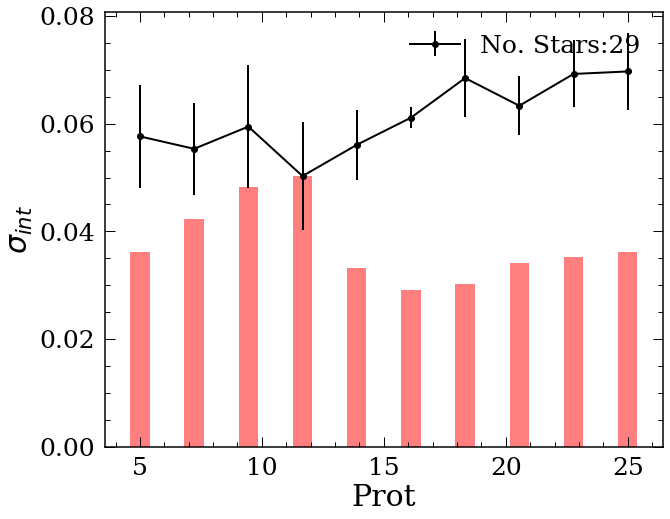

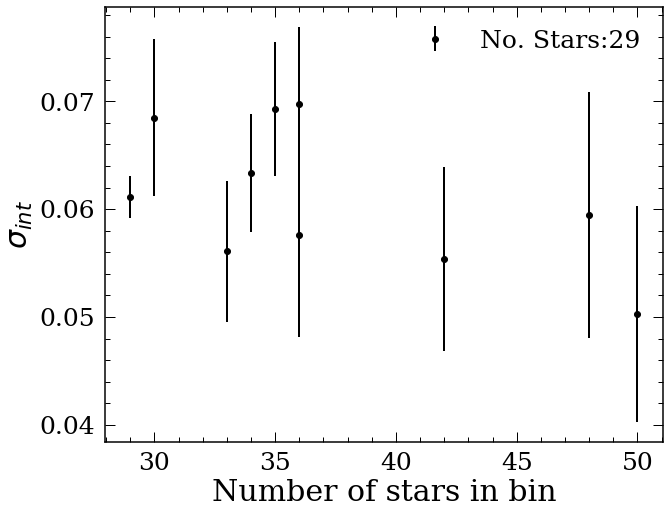

In [260]:
plt.figure(figsize=(10,8))
plt.errorbar(meanprot,sigma,yerr=sigma_err,fmt='k-o',label='No. Stars:'+str(int(min(starpick))))
normf=max(starpick/sigma)
plt.bar(meanprot,starpick/normf,color='r',alpha=0.5)
plt.xlabel('Prot')
plt.ylabel('$σ_{int}$')
plt.legend()

plt.figure(figsize=(10,8))
plt.errorbar(starpick,sigma,yerr=sigma_err,fmt='ko',label='No. Stars:'+str(int(min(starpick))))
plt.xlabel('Number of stars in bin')
plt.ylabel('$σ_{int}$')
plt.legend()

# Calculate for all elements

In [ ]:
Nopoints=10
trytime=50

protselect=np.linspace(5,25,Nopoints)

disps=np.zeros((trytime,len(protselect)))

for i in trange(trytime):
    meanprot,disps[i,:],starpick=calcdisp_prot(protreal,'C',protselect,5)

sigma=[np.mean(pd.Series(disps[:,i]).dropna()) for i in range(Nopoints)]
sigma_err=[np.std(pd.Series(disps[:,i]).dropna()) for i in range(Nopoints)]

In [289]:
def plotagedis(protreal,protselect,window=5,trytime=50):
    abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','RB_FE']

    abun_apog_err=[i+'_ERR' for i in abun_apog]

    abund={'C_FE':'[CI/','MG_FE':'[MgI/','AL_FE':'[AlI/','SI_FE':'[SiI/','S_FE':'[ScI/',
       'CA_FE':'[CaI/','TI_FE':'[TiI/','CR_FE':'[CrI/','MN_FE':'[MnI/','CO_FE':'[CoI/',
       'NI_FE':'[NiI/','CU_FE':'[CuI/','O_FE':'[O/','NA_FE':'[Na/','K_FE':'[K/','V_FE':'[V/',
      'P_FE':'[P/','RB_FE':'[Rb/','N_FE':'[N/','M_H':'[Fe/'}
    
    plt.figure(figsize=(22.5,25))
    for i in range(len(abun_apog)):
        #clear_output(wait = True)
        
        protreal_drop=protreal.loc[protreal[abun_apog[i]]>-100].reset_index(drop=True)
        print(abun_apog[i],len(protreal_drop))
        if len(protreal_drop)<10:
            plt.subplot(5,4,i+1)
            plt.title(abun_apog[i],fontsize=25)
            continue
        disps=np.zeros((trytime,len(protselect)))

        for j in range(trytime):
            meanprot,disps[j,:],starpick=calcdisp_prot(protreal_drop,abun_apog[i],protselect,5)

        sigma=[np.mean(pd.Series(disps[:,j]).dropna()) for j in range(Nopoints)]
        sigma_err=[np.std(pd.Series(disps[:,j]).dropna()) for j in range(Nopoints)]
        
        plt.subplot(5,4,i+1)
        plt.errorbar(meanprot,sigma,yerr=sigma_err,fmt='k-o',label='No. Stars:'+str(int(min(starpick))))
        normf=max(starpick/sigma)
        plt.bar(meanprot,starpick/normf,color='r',alpha=0.5)
        plt.xlabel('Prot')
        plt.ylabel('$σ_{int}$')
        plt.legend()
        plt.title(abun_apog[i],fontsize=25)
        

    
    # for C/N
    protreal_drop=protreal.loc[protreal['C_FE']>-100]
    protreal_drop=protreal_drop.loc[protreal_drop['N_FE']>-100]
    protreal_drop['C_N']=protreal_drop['C_FE']-protreal_drop['N_FE']
    protreal_drop['C_N_ERR']=np.sqrt(protreal_drop['C_FE_ERR']**2.+protreal_drop['N_FE_ERR']**2.)
    protreal_drop=protreal_drop.reset_index(drop=True)

    clear_output(wait = True)
    plt.subplot(5,4,20)
    disps=np.zeros((trytime,len(protselect)))

    for j in range(trytime):
        meanprot,disps[j,:],starpick=calcdisp_prot(protreal_drop,'C_N',protselect,5)

    sigma=[np.mean(pd.Series(disps[:,j]).dropna()) for j in range(Nopoints)]
    sigma_err=[np.std(pd.Series(disps[:,j]).dropna()) for j in range(Nopoints)]
        
    plt.errorbar(meanprot,sigma,yerr=sigma_err,fmt='k-o',label='No. Stars:'+str(int(min(starpick))))
    normf=max(starpick/sigma)
    plt.bar(meanprot,starpick/normf,color='r',alpha=0.5)
    plt.xlabel('Prot')
    plt.ylabel('$σ_{int}$')
    plt.title('C_N',fontsize=25)
    plt.legend()
    plt.tight_layout()
    clear_output(wait = True)
    #plt.savefig('age_disp_as.png')

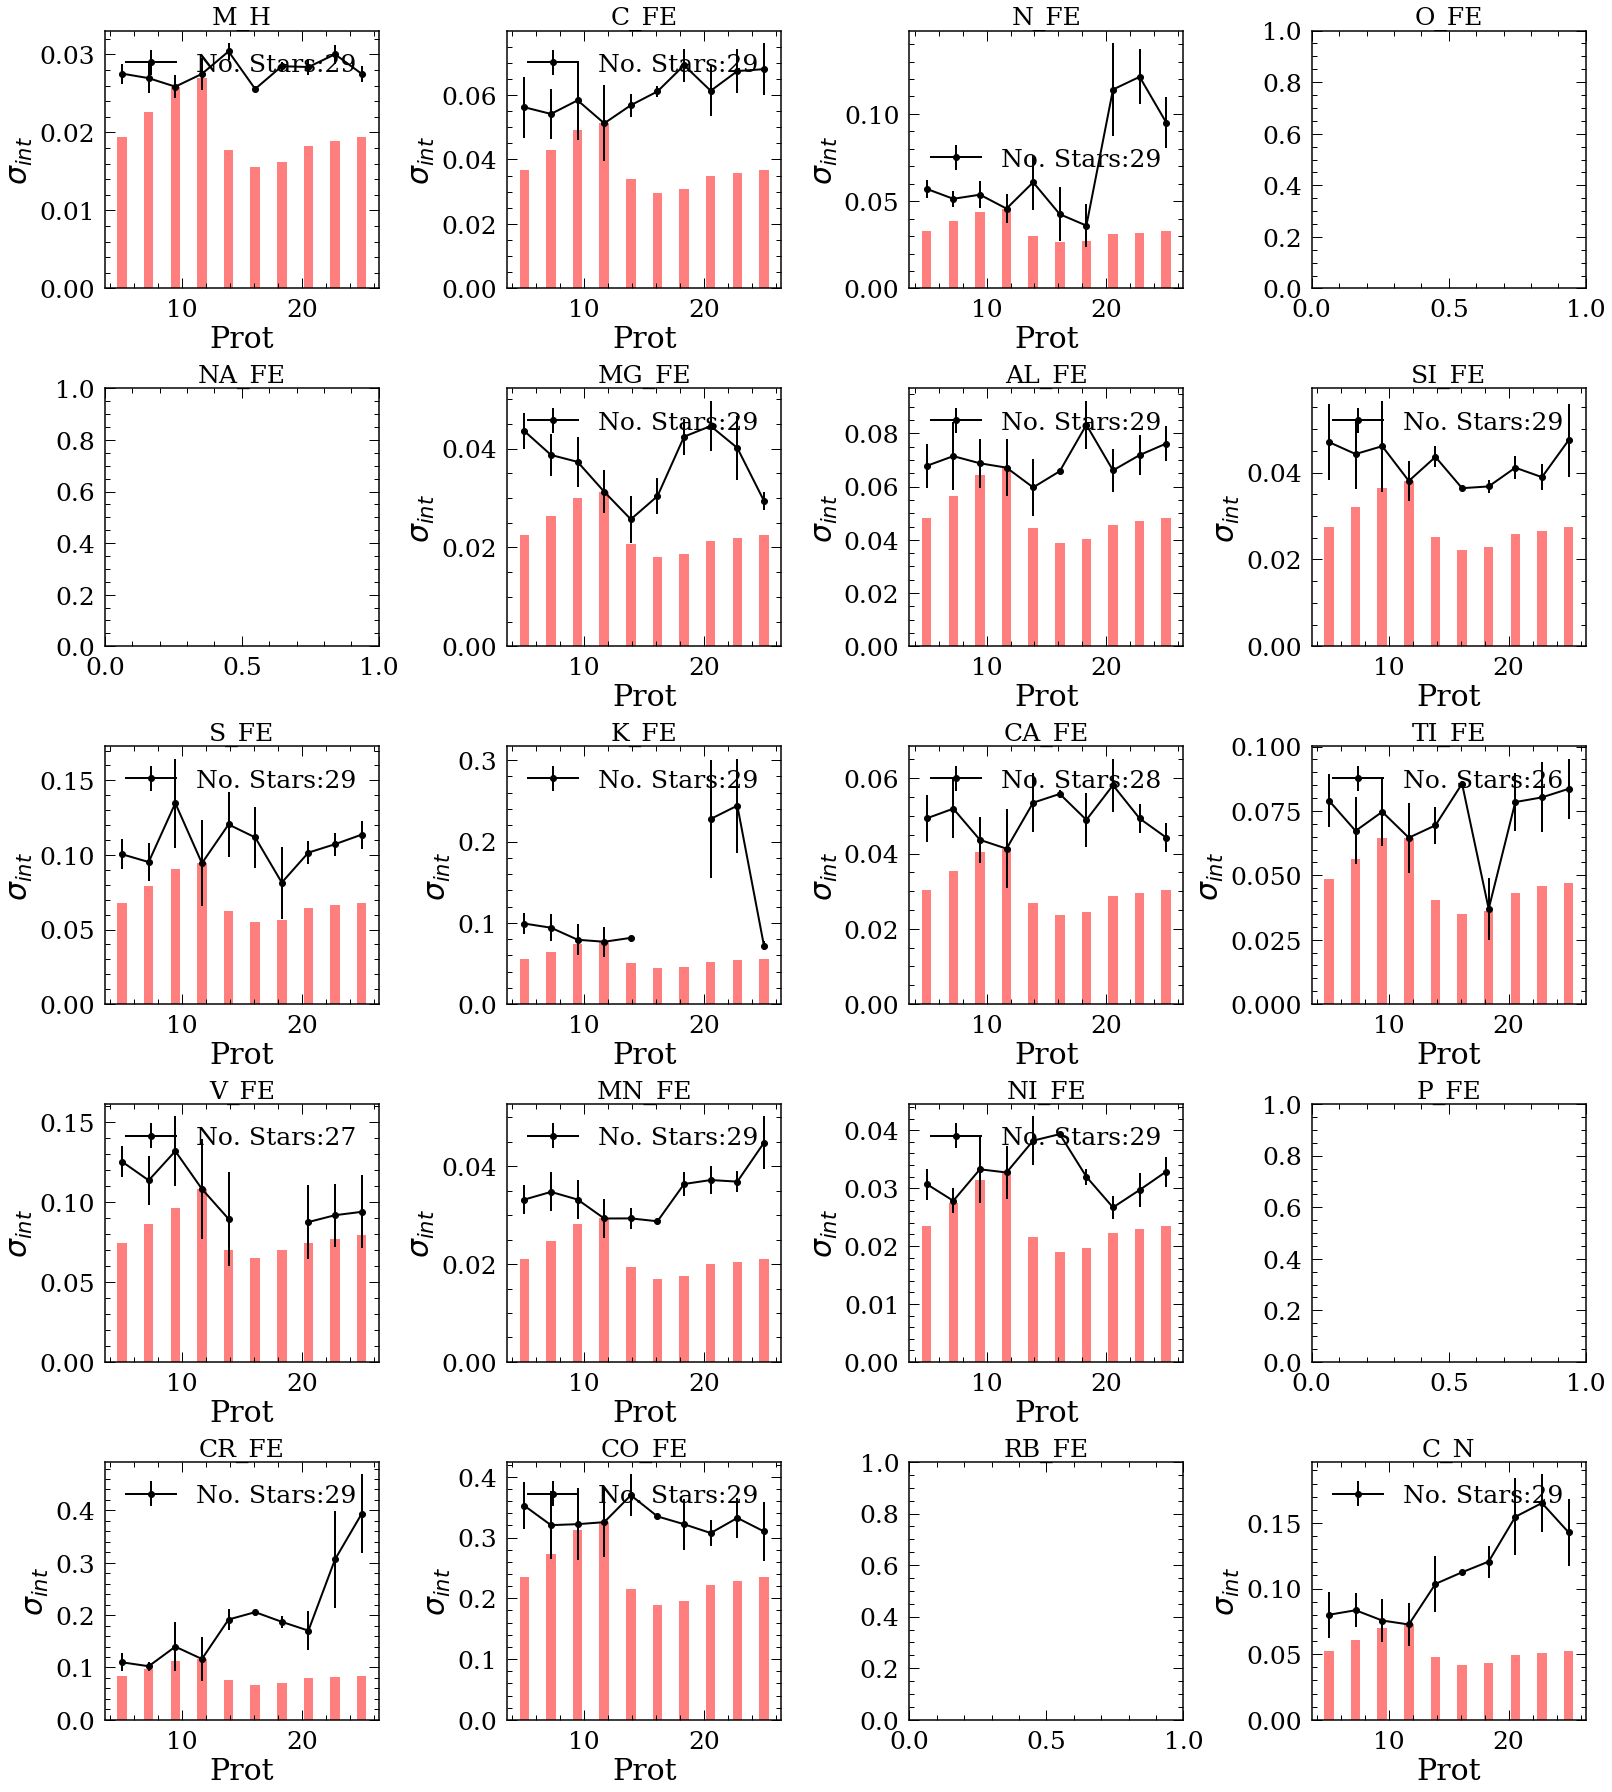

In [290]:
protselect=np.linspace(5,25,Nopoints)
plotagedis(protreal,protselect,window=5,trytime=50)